In [1]:
# import tensorflow as tf
# from tensorflow import keras

# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# assert x_train.shape == (50000, 32, 32, 3)
# assert x_test.shape == (10000, 32, 32, 3)
# assert y_train.shape == (50000, 1)
# assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 132s 1us/step


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Cargar y dividir el conjunto de datos CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizar las imágenes al rango [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Crear el modelo de red convolucional
model = models.Sequential([
    # Capa de convolución 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    # Capa de convolución 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Capa de convolución 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Capa completamente conectada (flatten)
    layers.Flatten(),
    
    # Capas completamente conectadas
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # 10 clases de salida para CIFAR-10
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [3]:
# Resumen del modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# Entrenar el modelo
history = model.fit(train_images, train_labels, epochs=15, 
                    validation_data=(test_images, test_labels))

Epoch 1/15
1563/1563 [==============================] - 57s 18ms/step - loss: 1.5255 - accuracy: 0.4445 - val_loss: 1.2364 - val_accuracy: 0.5483
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1552 - accuracy: 0.5868 - val_loss: 1.0486 - val_accuracy: 0.6285
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9933 - accuracy: 0.6504 - val_loss: 1.0144 - val_accuracy: 0.6422
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8971 - accuracy: 0.6870 - val_loss: 0.9589 - val_accuracy: 0.6622
Epoch 5/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8229 - accuracy: 0.7114 - val_loss: 0.8979 - val_accuracy: 0.6851
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7707 - accuracy: 0.7306 - val_loss: 0.8767 - val_accuracy: 0.6952
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7216 - accuracy: 0.7471 - val_loss: 0.8477 -

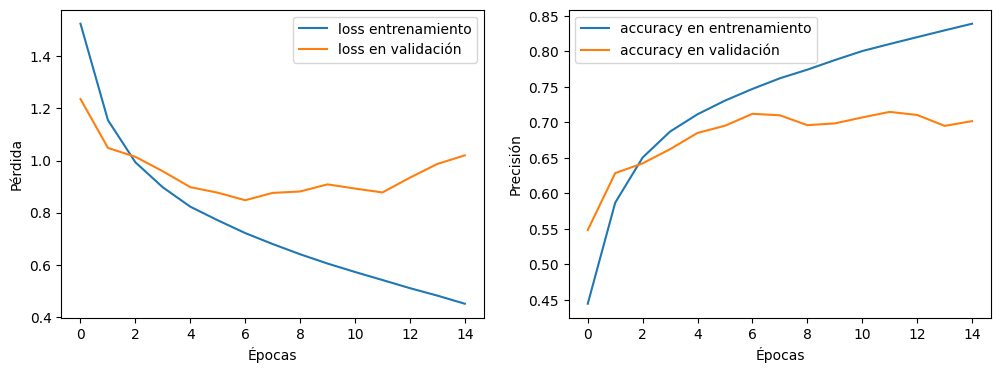

In [6]:
import matplotlib.pyplot as plt

# Graficar la pérdida (loss) en el conjunto de entrenamiento y en el conjunto de validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss entrenamiento')
plt.plot(history.history['val_loss'], label='loss en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar la precisión (accuracy) en el conjunto de entrenamiento y en el conjunto de validación
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy en entrenamiento')
plt.plot(history.history['val_accuracy'], label='accuracy en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()

In [7]:
# Evaluar la precisión del modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("\nPrecisión en el conjunto de prueba:", test_acc)

313/313 - 2s - loss: 1.0201 - accuracy: 0.7017 - 2s/epoch - 5ms/step

Precisión en el conjunto de prueba: 0.70169997215271
